In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

cellpose_path = '/project/data/CellPose-train/'
img_format = 'train_raw/{:03d}_img.png'
ann_format = 'train_raw/{:03d}_masks.png'

In [9]:
i = 0
imgs = []
anns = []
while os.path.exists(cellpose_path + img_format.format(i)) and os.path.exists(cellpose_path + ann_format.format(i)):
    img = cv2.imread(cellpose_path + img_format.format(i))
    ann = cv2.imread(cellpose_path + ann_format.format(i), cv2.IMREAD_UNCHANGED)
    
    #resize longest side to 512
    if img.shape[0] > img.shape[1]:
        img = cv2.resize(img, (int(img.shape[1] * (512 / img.shape[0])), 512))
        ann = cv2.resize(ann, (int(ann.shape[1] * (512 / ann.shape[0])), 512))
    else:
        img = cv2.resize(img, (512, int(img.shape[0] * (512 / img.shape[1]))))
        ann = cv2.resize(ann, (512, int(ann.shape[0] * (512 / ann.shape[1]))))
        
    #pad to 512x512
    img = cv2.copyMakeBorder(img, 0, 512 - img.shape[0], 0, 512 - img.shape[1], cv2.BORDER_CONSTANT, value=0)
    ann = cv2.copyMakeBorder(ann, 0, 512 - ann.shape[0], 0, 512 - ann.shape[1], cv2.BORDER_CONSTANT, value=0)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    imgs.append(img)
    anns.append(ann)
    i += 1

print('found {} images'.format(i))

found 540 images


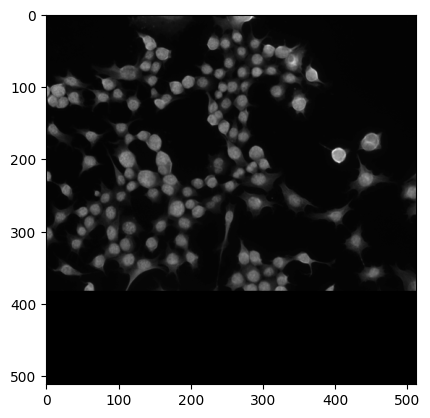

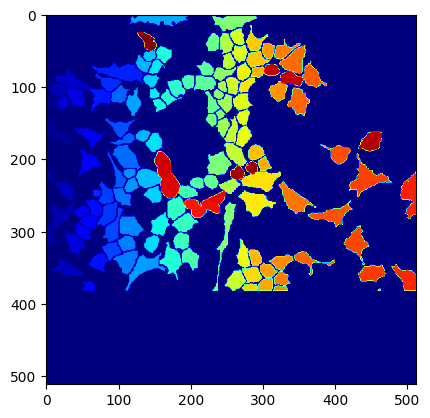

15


In [10]:
random_idx = np.random.randint(0, len(imgs))
plt.imshow(imgs[random_idx], cmap='gray')
plt.show()
plt.imshow(anns[random_idx], cmap='jet')
plt.show()

print(random_idx)

In [11]:
anns = np.array(anns)
print(anns)
print(len(anns))

[[[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 ...

 [[ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 2  2  2 ...  0  0 31]
  [ 2  2  2 ...  0  0 31]
  [ 2  2  2 ...  0 31 31]
  ...
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]

 [[ 1  1  1 ...  0  0  0]
  [ 1  1  1 ...  0  0  0]
  [ 1  1  1 ...  0  0  0]
  ...
  [24 24 24 ...  0  0  0]
  [24 24 24 ...  0  0  0]
  [ 0  0  0 ...  0  0  0]]]
540


In [12]:
anns = np.array(anns)
imgs = np.array(imgs)
#add a add a channel dimension
anns = np.expand_dims(anns, axis=1)
anns = np.concatenate((anns, np.zeros_like(anns)), axis=1)

print(anns.shape)
print(imgs.shape)

(540, 2, 512, 512)
(540, 512, 512)


In [13]:
#save as imgs and anns .npy files
np.save(cellpose_path + 'imgs.npy', np.array(imgs))

#add empty "crowd" class
anns = np.array(anns)
print(anns.shape)
np.save(cellpose_path + 'anns.npy', np.array(anns))

(540, 2, 512, 512)


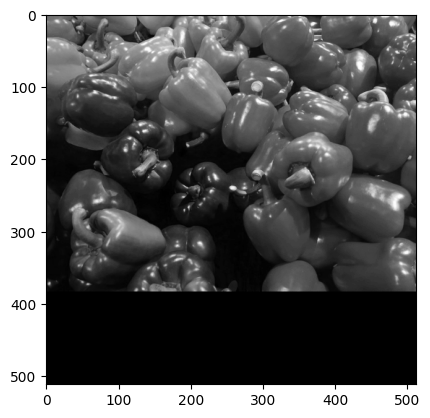

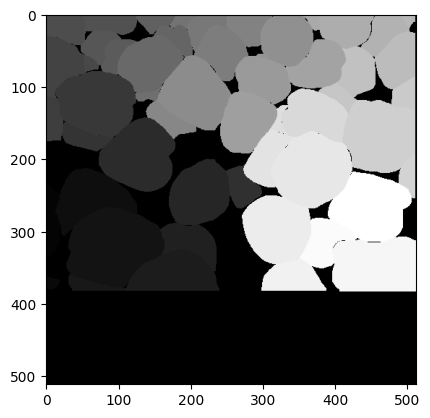

In [14]:
imgs = np.load(cellpose_path + 'imgs.npy')
anns = np.load(cellpose_path + 'anns.npy')

idx = np.random.randint(0, len(imgs))
plt.imshow(imgs[idx], cmap='gray')
plt.show()
plt.imshow(anns[idx, 0], cmap='gray')
plt.show()